In [103]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder as LE, StandardScaler as SS
from sklearn.model_selection import train_test_split as TTS, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.linear_model import LinearRegression as LR, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_squared_error as MSE, r2_score as R2

In [83]:
data = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

In [84]:
data['Genre'] = data['Genre'].fillna(data['Genre'].mode()[0])
data['Director'] = data['Director'].fillna(data['Director'].mode()[0])
data['Actor 1'] = data['Actor 1'].fillna(data['Actor 1'].mode()[0])
data['Actor 2'] = data['Actor 2'].fillna(data['Actor 2'].mode()[0])
data['Actor 3'] = data['Actor 3'].fillna(data['Actor 3'].mode()[0])
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

In [85]:
data = data.drop(['Name', 'Year', 'Duration', 'Votes'], axis=1)

In [86]:
le = LE()
for i in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    data[i] = le.fit_transform(data[i])

In [87]:
X = data.drop(['Rating'], axis=1)
y = data['Rating']

In [88]:
X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.20, random_state=5)

In [89]:
sc = SS()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
models = {
    'Linear Regressor': LR(fit_intercept=True),
    'Decision Tree Regressor': DTR(criterion='poisson'),  # Other options: 'friedman_mse', 'mae', 'poisson'
    'Random Forest Regressor': RFR(criterion='poisson'),  # Other options: 'absolute_error', 'poisson'
    'Support Vector Regressor': SVR(kernel='rbf', C=1.0, epsilon=0.1),  # Other options: kernel ('linear', 'poly', 'sigmoid'), C, epsilon
    'K-Nearest Neighbors Regressor': KNR(n_neighbors=5, weights='uniform')  # Other options: weights ('distance')
}

In [100]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = MSE(y_test, y_pred)
    r2 = R2(y_test, y_pred)
    print(f"{model_name}: MSE = {mse:.2f}, R2 = {r2:.2f}")

Linear Regressor: MSE = 0.97, R2 = 0.01
Decision Tree Regressor: MSE = 1.80, R2 = -0.84
Random Forest Regressor: MSE = 0.93, R2 = 0.05
Support Vector Regressor: MSE = 0.96, R2 = 0.02
K-Nearest Neighbors Regressor: MSE = 1.10, R2 = -0.12


In [104]:
param_grids = {
    'Linear Regressor': {
        'model': LR(),
        'params': {'fit_intercept': [True, False]}
    },
    'Ridge Regressor': {
        'model': Ridge(),
        'params': {'alpha': [0.1, 1, 10]}
    },
    'Lasso Regressor': {
        'model': Lasso(),
        'params': {'alpha': [0.1, 1, 10]}
    },
    'Decision Tree Regressor': {
        'model': DTR(),
        'params': {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
    },
    'Random Forest Regressor': {
        'model': RFR(),
        'params': {'n_estimators': [10, 50, 100], 'criterion': ['squared_error', 'absolute_error', 'poisson']}
    },
    'Gradient Boosting Regressor': {
        'model': GBR(),
        'params': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5]}
    },
    'Support Vector Regressor': {
        'model': SVR(),
        'params': {'kernel': ['rbf', 'linear', 'poly'], 'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]}
    },
    'K-Nearest Neighbors Regressor': {
        'model': KNR(),
        'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    }
}

In [ ]:
for model_name, model in param_grids.items():
    print(f"Running Grid Search for {model_name}")
    grid_search = GridSearchCV(model['model'], model['params'], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = MSE(y_test, y_pred)
    r2 = R2(y_test, y_pred)
    print(f"{model_name}: MSE = {mse:.2f}, R2 = {r2:.2f}, Best Params = {grid_search.best_params_}")

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

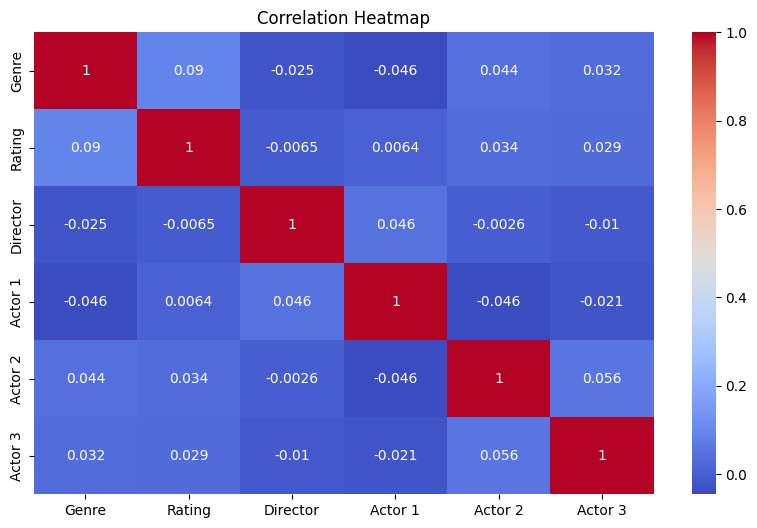

In [106]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [110]:
data1 = pd.DataFrame({'Testing Data': y_test, 'Predicted Data': y_pred})

In [111]:
data1.head()

,Testing Data,Predicted Data
8598,5.841621,5.973297
2440,5.841621,6.708324
12767,7.000000,5.704973
6035,6.400000,6.373297
7016,5.841621,5.828324


In [112]:
data1['Testing Data'] = data1['Testing Data'].astype(int)
data1['Predicted Data'] = data1['Predicted Data'].astype(int)

In [115]:
data1['Testing Data'].value_counts().sort_index()

Testing Data
1        4
2       29
3      127
4      257
5     1884
6      466
7      256
8       70
9        8
10       1
Name: count, dtype: int64

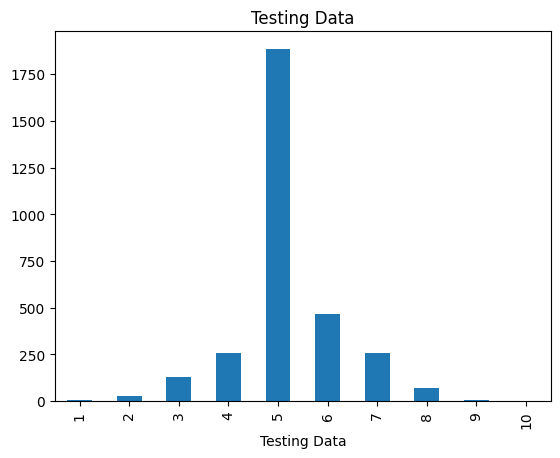

In [113]:
data1['Testing Data'].value_counts().sort_index().plot(kind='bar')
plt.title('Testing Data')
plt.show()

In [116]:
data1['Predicted Data'].value_counts().sort_index()

Predicted Data
3       3
4     125
5    1863
6    1084
7      27
Name: count, dtype: int64

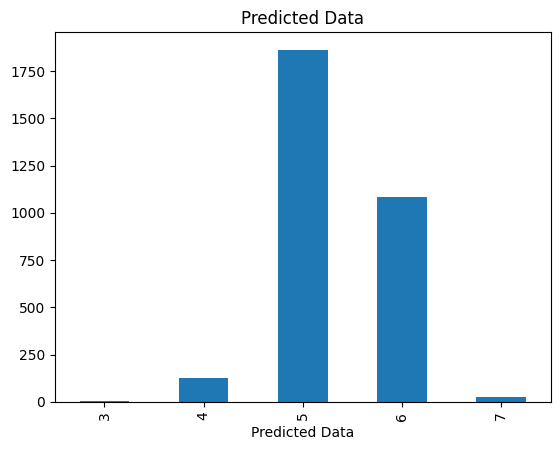

In [114]:
data1['Predicted Data'].value_counts().sort_index().plot(kind='bar')
plt.title('Predicted Data')
plt.show()